# Retail Sales Dataset Analysis

The dataset named "Retail Sales Dataset" from Kaggle is used in this project. The dataset can be accessed from the following link -- https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data.

## Data Loading and Exploration

Description of different columns of the dataset is given below :

1. **Transaction ID**  : A unique identifier for each transaction, allowing tracking and reference.
2. **Date**            : The date when the transaction occurred, providing insights into sales trends over time.
3. **Customer ID**     : A unique identifier for each customer, enabling customer-centric analysis.
4. **Gender**          : The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.
5. **Age**             : The age of the customer, facilitating segmentation and exploration of age-related influences.
6. **Product Category**: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.
7. **Quantity**        : The number of units of the product purchased, contributing to insights on purchase volumes.
8. **Price per Unit**  : The price of one unit of the product, aiding in calculations related to total spending.
9. **Total Amount**    : The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
sale_data = pd.read_csv("retail_sales_dataset.csv")

In [3]:
# The data
sale_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Information about different datatypes in different columns of the dataset
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# Summary of different numerical columns of the dataset
sale_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
# Checking for missing values
sale_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## Data Preprocessing and Data Cleaning

In this step, we have two objectives :

1. Convert the **'Date'** column to datetime format
2. Adding useful features like **Month** and **DayOfWeek**

In [7]:
# Converting 'Date' to datetime format
sale_data['Date'] = pd.to_datetime(sale_data['Date'])

In [8]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [9]:
#Adding useful features like Month and DayOfWeek
sale_data['Month'] = sale_data['Date'].dt.to_period('M')       # Monthly period
sale_data['DayOfWeek'] = sale_data['Date'].dt.day_name()       # Day of week

In [10]:
sale_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,DayOfWeek
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,Saturday


## Analyzing Monthly Sales Trends

In [11]:
# Average sales data (monthly)
sale_monthly = sale_data.groupby(by = sale_data['Date'].dt.to_period('M'))['Total Amount'].sum()
sale_monthly = sale_monthly.to_frame().reset_index()
sale_monthly['Date'] = sale_monthly['Date'].astype(str)
sale_monthly['Date'] = pd.to_datetime(sale_monthly['Date'])
sale_monthly

,Date,Total Amount
0,2023-01-01,35450
1,2023-02-01,44060
2,2023-03-01,28990
3,2023-04-01,33870
4,2023-05-01,53150
5,2023-06-01,36715
6,2023-07-01,35465
7,2023-08-01,36960
8,2023-09-01,23620
9,2023-10-01,46580


In [12]:
# Loading required packages
from matplotlib import pyplot as plt

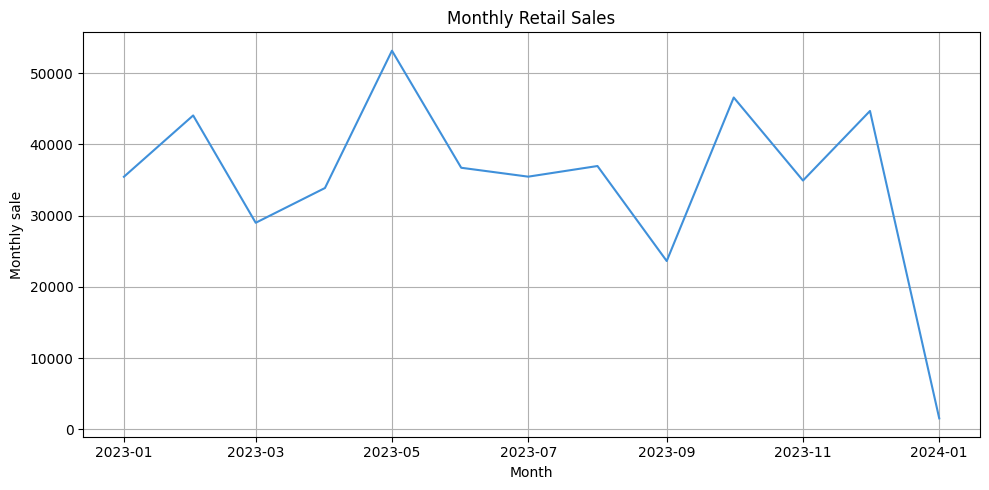

In [13]:
# Plotting the average monthly sales data
plt.figure(figsize = (10,5))
plt.style.use('petroff10')

plt.plot(sale_monthly['Date'], sale_monthly['Total Amount'])

plt.title('Monthly Retail Sales')
plt.xlabel('Month')
plt.ylabel('Monthly sale')

plt.tight_layout()

plt.grid()

plt.show()

The average sales trend over the months is now visualized. Key Observations:

* **Peak Month**: May 2023 has most sale (***53150***)
* **Lowest Month**: January 2024 has the least sale (***1530***) as we don't have complete data for January 2024.
* Sales were also strong in Feb 2023, Oct 2023 and Dec 2023.

**SUGGESTIONS**

1. Allocate resources during peak months **(Feb, Oct, Dec)**
2. Plan marketing during low seasons **(Mar, Sep)**

# Analyzing Top Product Categories

In [14]:
# Grouping total sales by categories
sale_Category = sale_data.groupby(by = sale_data['Product Category'])['Total Amount'].sum().sort_values(ascending = False)
sale_Category = sale_Category.to_frame().reset_index()

In [15]:
sale_Category

,Product Category,Total Amount
0,Electronics,156905
1,Clothing,155580
2,Beauty,143515


Now we plot the grouped data which is grouped by categories.

Text(0, 0.5, 'Total Amount')

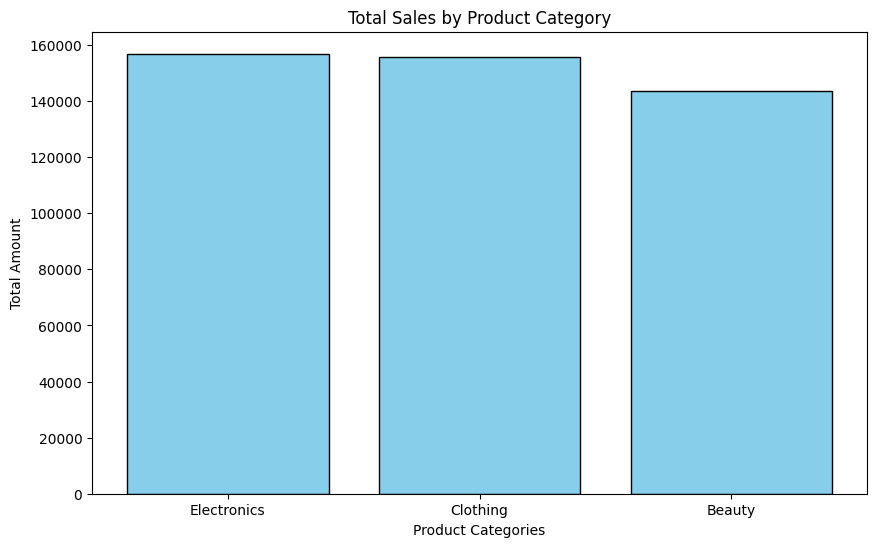

In [16]:
# plotting the grouped data
plt.style.use('petroff10')
plt.figure(figsize = (10,6))
plt.bar(sale_Category['Product Category'],
        sale_Category['Total Amount'],
       color ='skyblue',
       edgecolor='k')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Categories')
plt.ylabel('Total Amount')

The sales (by dollar) by product category:
* **Electronics** : 156905
* **Clothing**	: 155580
* **Beauty** : 143515

Electronics leads marginally, with Clothing close behind. Beauty products have slightly lower sales.

**SUGGESTIONS**
  
1. Consider targeted promotions for Beauty to boost its performance.
2. Optimize inventory for Electronics and Clothing based on their demand.

# Analysing Sales by Day of the Week

In [17]:
# Grouping total sales by day of week
Days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sale_DayOfWeek = sale_data.groupby(by = sale_data['DayOfWeek'])['Total Amount'].sum().reindex(Days)
sale_DayOfWeek = sale_DayOfWeek.to_frame().reset_index()

In [18]:
sale_DayOfWeek

,DayOfWeek,Total Amount
0,Sunday,58600
1,Monday,70250
2,Tuesday,69440
3,Wednesday,58770
4,Thursday,53835
5,Friday,66290
6,Saturday,78815


Now we plot the grouped data which is grouped by categories.

Text(0, 0.5, 'Total Amount')

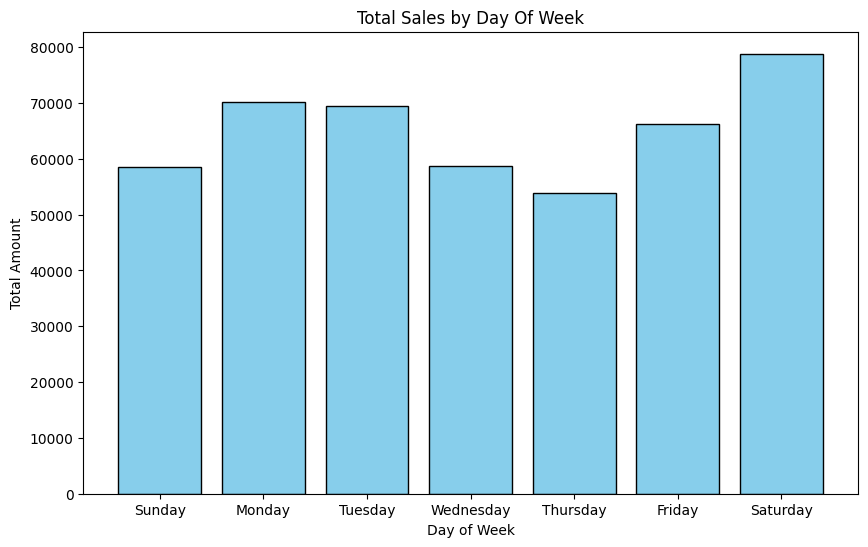

In [19]:
# plotting the grouped data
plt.style.use('petroff10')
plt.figure(figsize = (10,6))
plt.bar(sale_DayOfWeek['DayOfWeek'],
        sale_DayOfWeek['Total Amount'],
       color ='skyblue',
       edgecolor='k')
plt.title('Total Sales by Day Of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')

Key Observations:

1. **Weekend Sales** : Sales are highest on weekends. (Saturday and Sunday)
2. **Monday and Tuesday Sales** : Sales are relatively higher compared to other weekdays.
3. **Other Weekdays** : Lower sales comparedd to weekends and early weekdays.

**SUGGESTIONS**

1. Consider running weekend promotions or extending store hours to maximize revenue.
2. Investigate if these sales are tied to specific customer behaviors or recurring events. ***(any promotions or discounts or reason of demand)***
3. Boost mid-week sales through targeted campaigns like 'Midweek Specials' or discounts.

# Analysing Customer Demographics

We are going to evaluate sales distribution by gender and age.

In [20]:
# Grouping total sales by gender
sale_Gender = sale_data.groupby(by = sale_data['Gender'])['Total Amount'].sum()
sale_Gender = sale_Gender.to_frame().reset_index()

In [21]:
sale_Gender

,Gender,Total Amount
0,Female,232840
1,Male,223160


Now we plot the grouped data which is grouped by gender.

Text(0, 0.5, 'Total Amount')

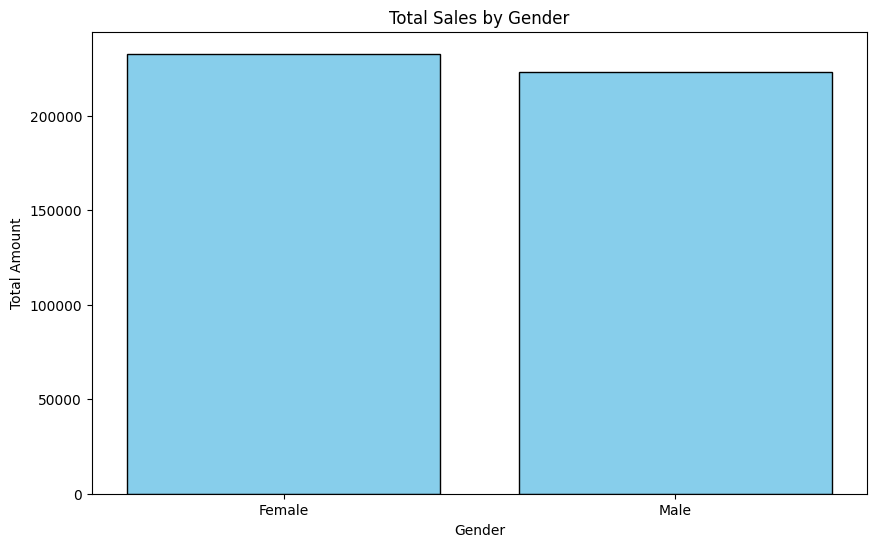

In [22]:
# plotting the grouped data
plt.style.use('petroff10')
plt.figure(figsize = (10,6))
plt.bar(sale_Gender['Gender'],
        sale_Gender['Total Amount'],
       color ='skyblue',
       edgecolor='k')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')

**Key Observations** :
* Female customers account for a larger share of sales (***$232,840***), possibly due to preferences for product categories like ***clothing***, ***beauty***.
  
* Male customers contribute significantly but slightly less(***$223,160***), potentially favoring categories like **electronic**.

In [23]:
# Grouping total sales by gender
labels = ['<20', '20-30', ' 30-40', '40-50', '50-60', '>60']
sale_data['AgeGroup'] = pd.cut(sale_data['Age'], 
                                bins = [ 0, 20, 30, 40, 50, 60,100],
                                labels = labels)


sale_AgeGroup = sale_data.groupby(by = sale_data['AgeGroup'], observed=True)['Total Amount'].sum()
sale_AgeGroup = sale_AgeGroup.to_frame().reset_index()

In [24]:
sale_AgeGroup

,AgeGroup,Total Amount
0,<20,34730
1,20-30,98215
2,30-40,95950
3,40-50,93795
4,50-60,100085
5,>60,33225


Now we plot the grouped data which is grouped by gender.

Text(0, 0.5, 'Total Amount')

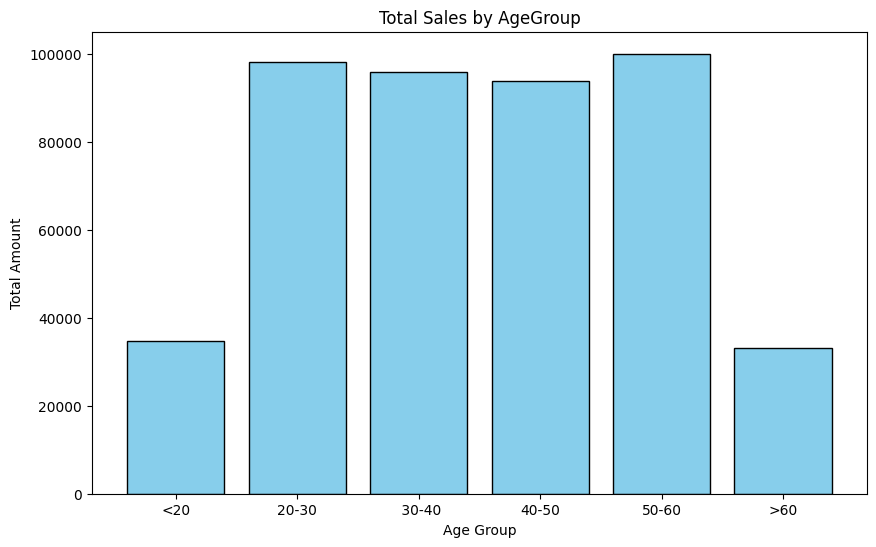

In [25]:
# plotting the grouped data
plt.style.use('petroff10')
plt.figure(figsize = (10,6))
plt.bar(sale_AgeGroup['AgeGroup'],
        sale_AgeGroup['Total Amount'],
       color ='skyblue',
       edgecolor='k')
plt.title('Total Sales by AgeGroup')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')

**Key Observations** :

* Customer aged ***50-60*** show the highest spending likely due to higher disposable income of family-oriented purchases.
* Young adults ***(20-30)*** also contribute significantly, possibly due to independent lifestyles or tech-savvy buying patterns.
* The lowest sales in the ***<20 & >60*** age groups may reflect limited purchasing power or a smaller proportion of the customer base.

**Suggestions**:

* ***For 50-60 Age Group*** : Focus on premium or high value products, and family-oriented products.
* ***For 20-30 Age Group*** : Enhance digital marketing efforts, targeting tech, fashion products.

# Saving the final data for tableau

In [30]:
sale_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,DayOfWeek,AgeGroup
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,Friday,30-40
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,Monday,20-30
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,Friday,40-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,Sunday,30-40
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,Saturday,20-30


In [31]:
sale_data.to_csv("FinalSaleData.csv", index = False)